In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters':
  os.chdir(r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.

/var/folders/l7/qksjftz12pz0s32y0l3jd4k4cyyb65/T/ipykernel_11598/4212331884.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


Text(0.5, 1.0, 'Skid time vs initial speed')

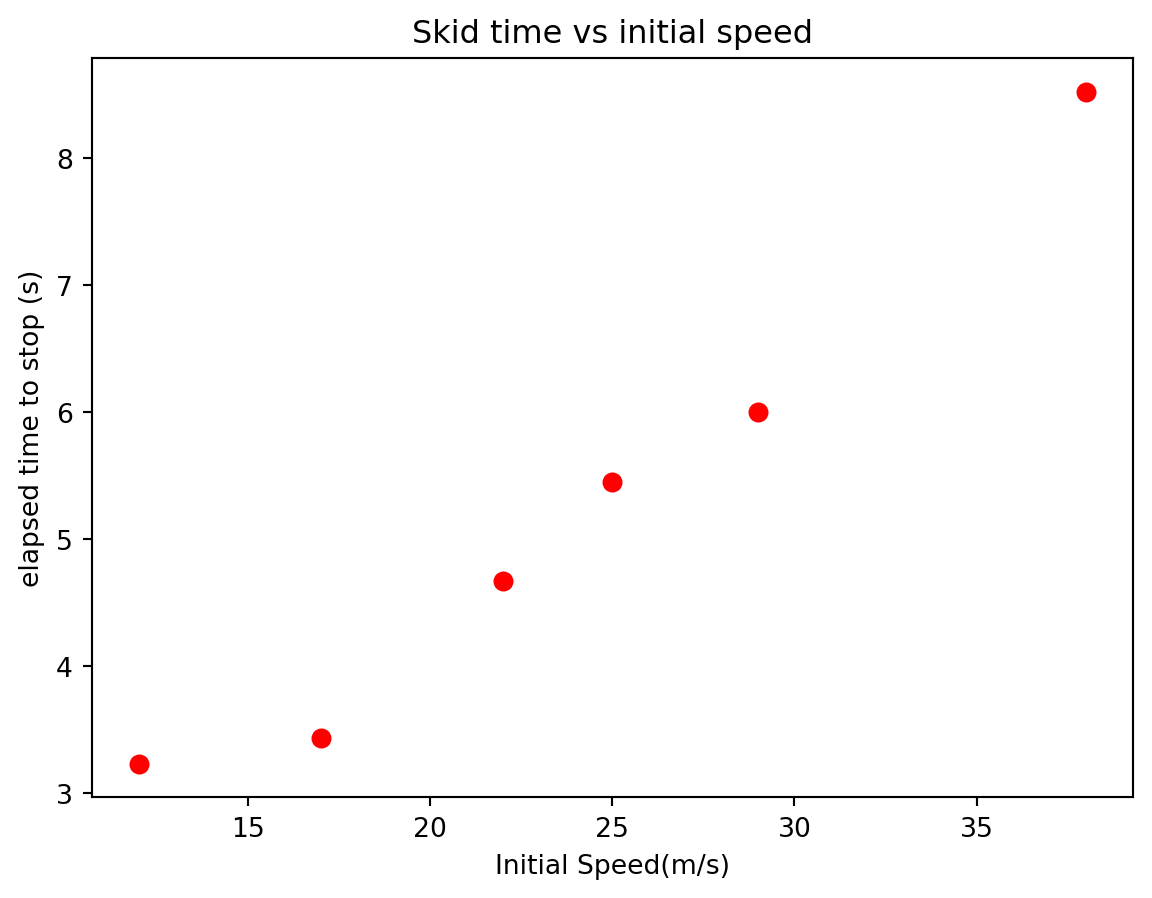

In [2]:
#| echo: false

from matplotlib import pyplot as plt

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]
plt.plot(vi,t,'r.',ms = 13)
plt.xlabel("Initial Speed(m/s)")
plt.ylabel("elapsed time to stop (s)")
plt.title("Skid time vs initial speed")

In [3]:
from matplotlib import pyplot as plt
from numpy import polyfit

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]

params = polyfit(vi,t,1)
slope = params[0]
yint = params[1]

g=9.8 #Acceleration due to gravity
mu = 1/(slope * g)
print(params)
print(mu)


[0.20971747 0.21840032]
0.48656326406696404


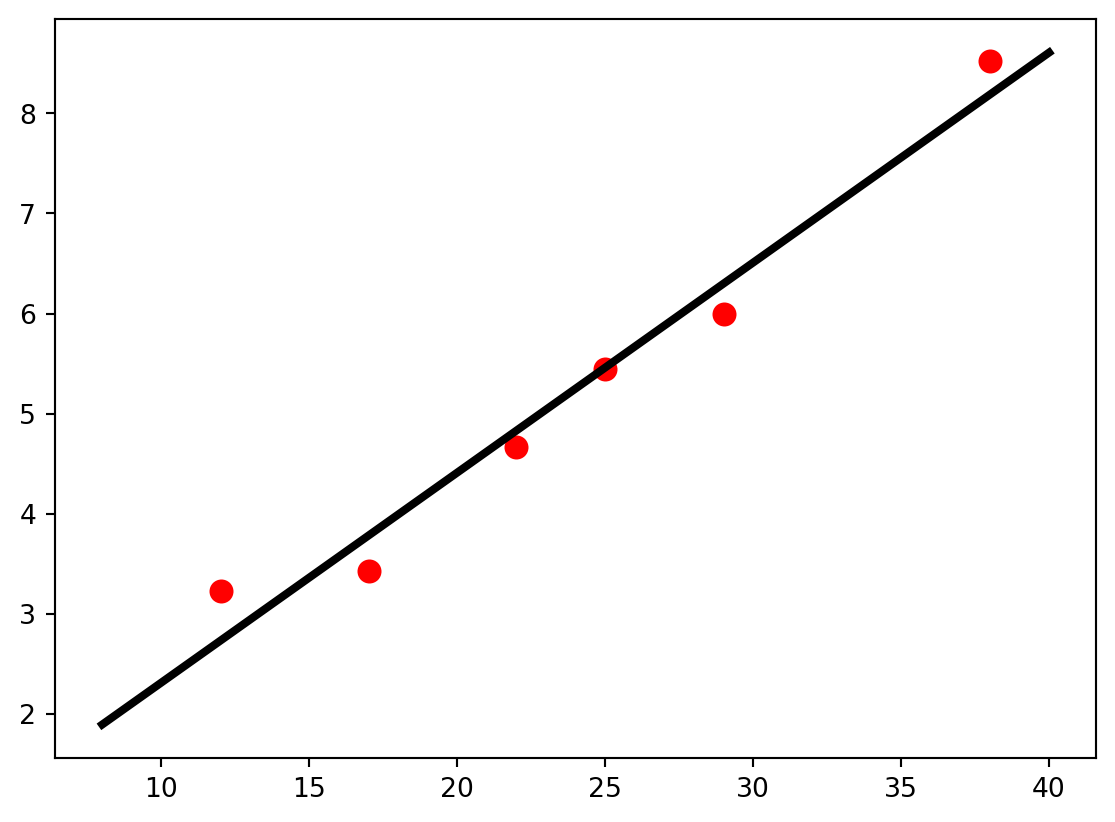

In [4]:
from matplotlib import pyplot as plt
from numpy import polyfit,linspace

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]

params = polyfit(vi,t,1)
vDense = linspace(8,40,100)
tDense = params[0] * vDense + params[1]

plt.plot(vi,t,'r.',ms = 16)
plt.plot(vDense,tDense,'k',lw = 3)


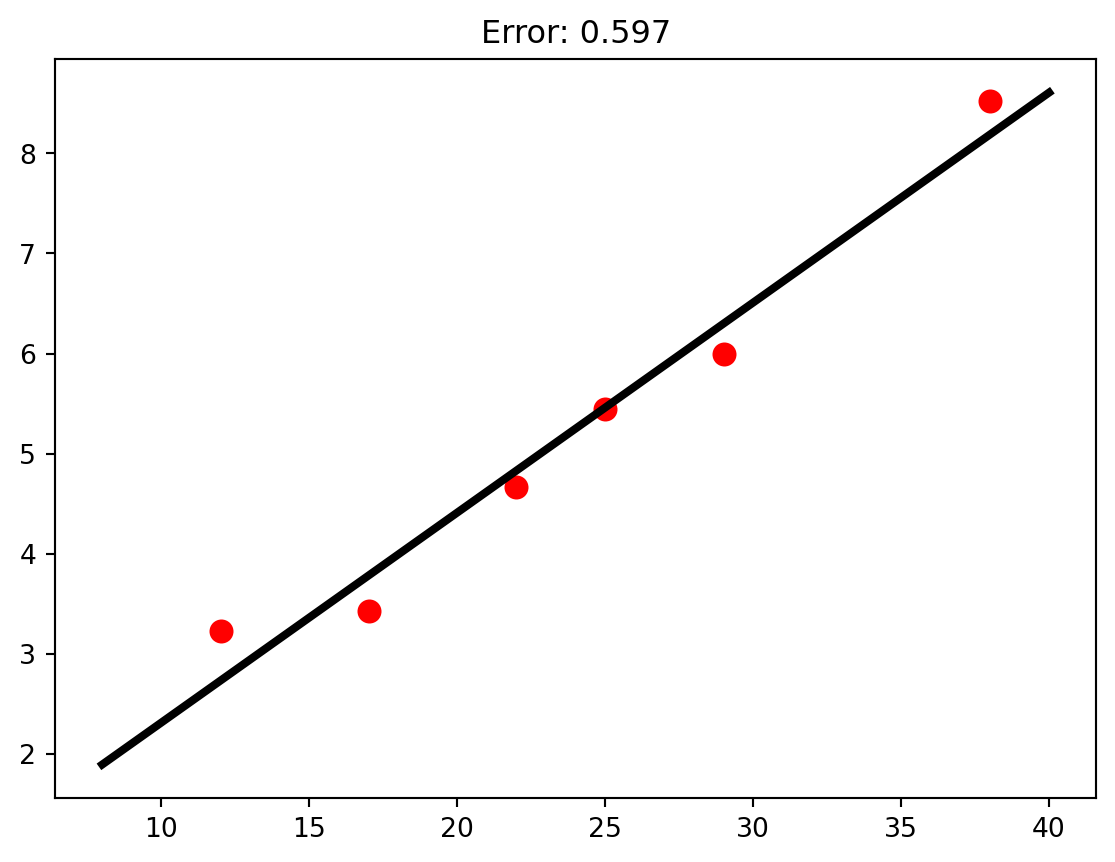

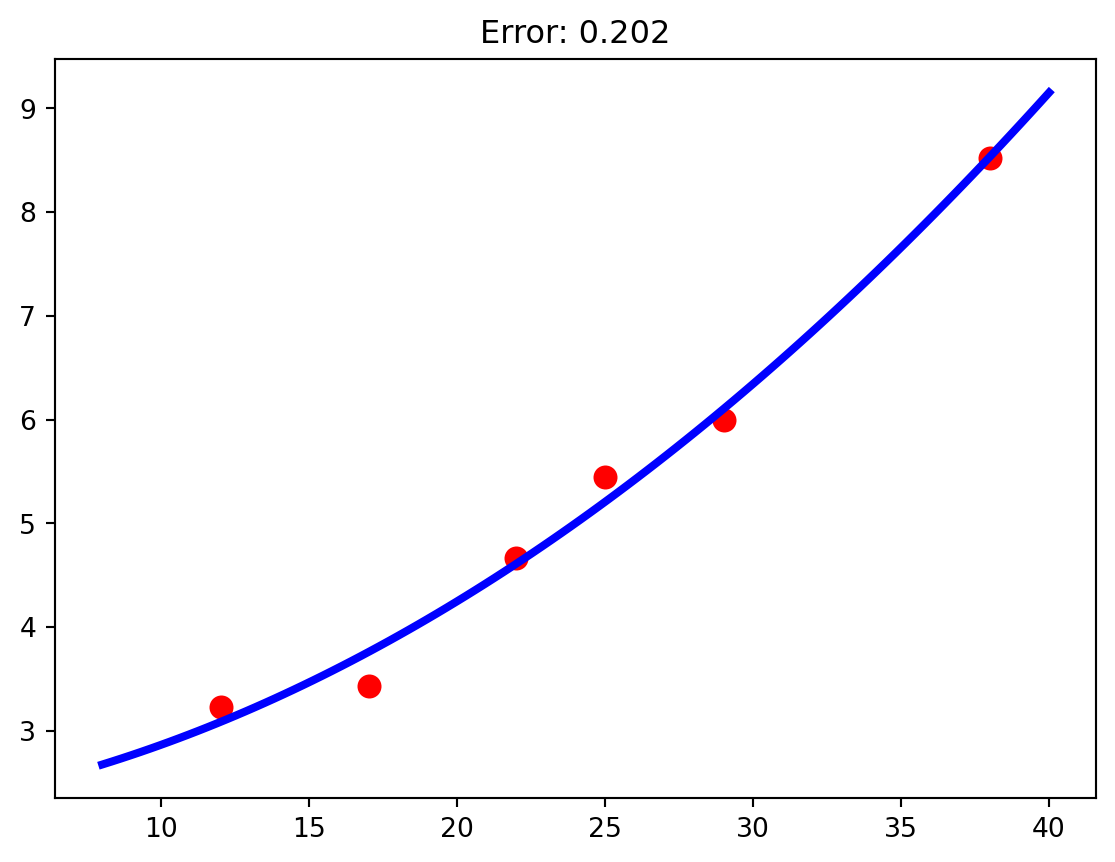

In [5]:
#| layout-ncol: 2

from matplotlib import pyplot as plt
from numpy import polyfit,linspace

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]

paramsLinear = polyfit(vi,t,1,full=True)
paramsQuadratic = polyfit(vi,t,2,full=True)
vDense = linspace(8,40,100)
tDenseLinear = paramsLinear[0][0] * vDense + paramsLinear[0][1]
tDenseQuadratic = paramsQuadratic[0][0] * vDense**2 + paramsQuadratic[0][1] * vDense + paramsQuadratic[0][2]

errorLinear = paramsLinear[1][0]
errorQuadratic = paramsQuadratic[1][0]

plt.plot(vi,t,'r.',ms = 16)
plt.plot(vDense,tDenseLinear,'k',lw = 3)
plt.title(f"Error: {errorLinear:1.3f}")
plt.show()


plt.plot(vi,t,'r.',ms = 16)
plt.plot(vDense,tDenseQuadratic,'b',lw = 3)
plt.title(f"Error: {errorQuadratic:1.3f}")
plt.show()


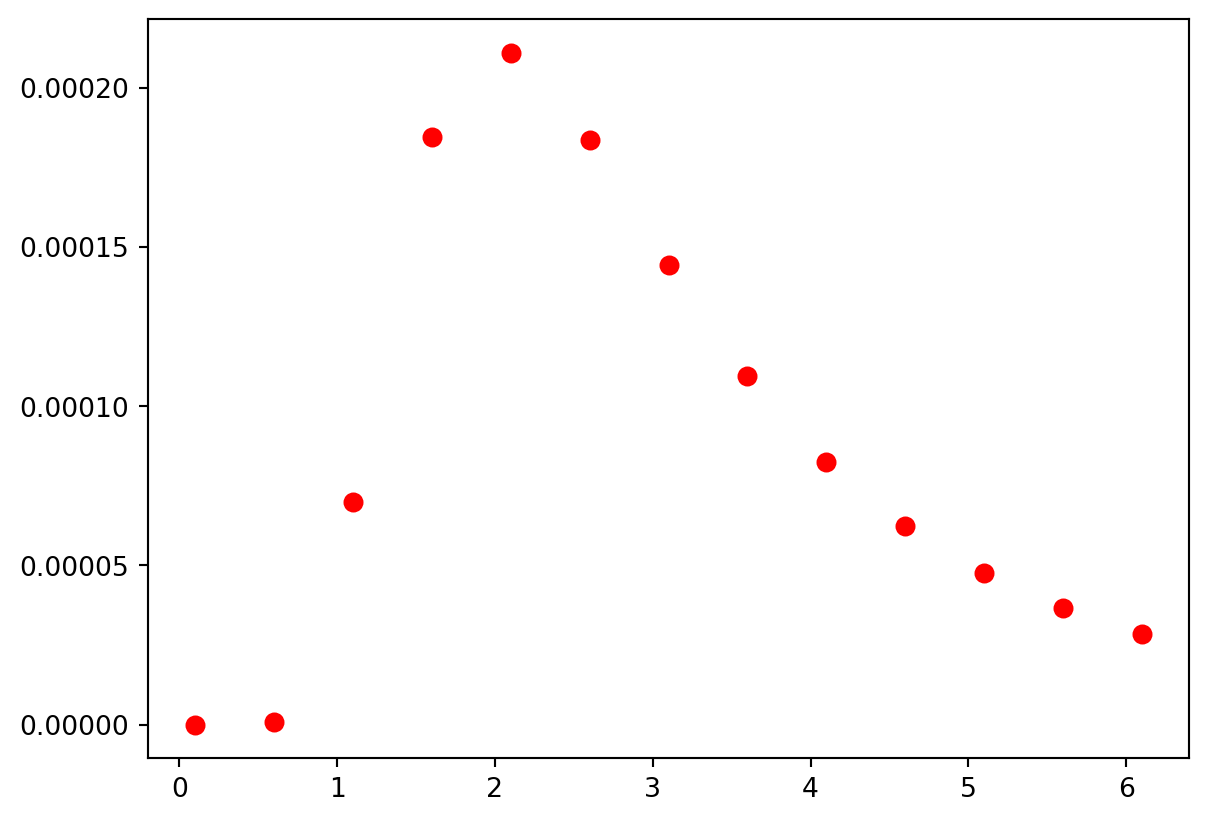

In [6]:
#| echo: false

from matplotlib import pyplot as plt

wavelength = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1]
intensity = [0, 7.43023e-7, 0.0000699768, 0.000184459,0.000211137, 0.000183716, 0.000144493, 0.000109646, 0.0000825034, 0.0000623056, 0.0000474756, 0.0000365799, 0.0000285178]
plt.plot(wavelength,intensity,'r.',ms = 13)

(array([ 1.21509047, 10.32796789]), array([[0.00225532, 0.0038109 ],
       [0.0038109 , 0.00717859]]))


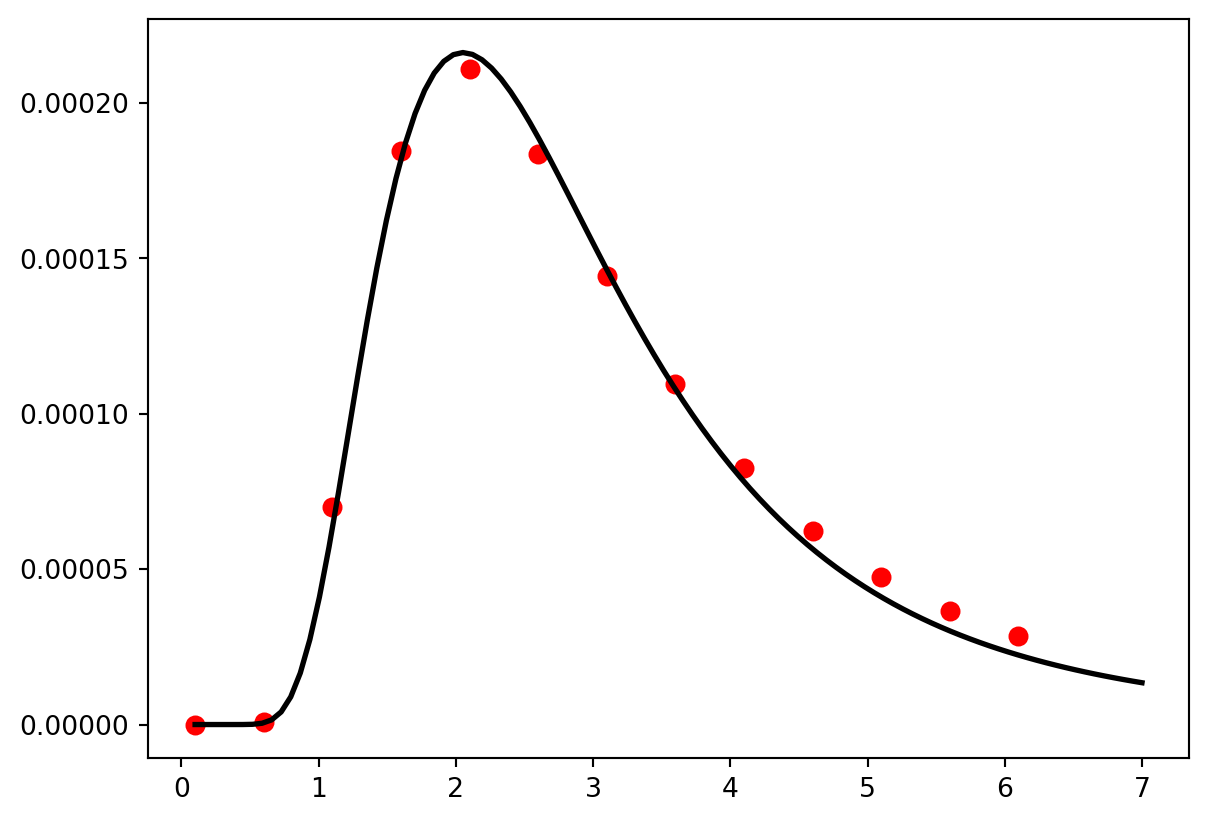

In [7]:
#| echo: true
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from numpy import exp,log

def fit_function(wvlength,a,b):
  return a * wvlength**-5 * 1/(exp(b/wvlength) + 1)

wavelength = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1]
intensity = [0, 7.43023e-7, 0.0000699768, 0.000184459, \
0.000211137, 0.000183716, 0.000144493, 0.000109646, 0.0000825034, \
0.0000623056, 0.0000474756, 0.0000365799, 0.0000285178]

params = curve_fit(fit_function,wavelength,intensity)
print(params)
wDense = linspace(0.1,7,100)
iDense = params[0][0] * wDense**-5 * 1/(exp(params[0][1]/wDense) + 1)

plt.plot(wavelength,intensity,'r.',ms = 13)
plt.plot(wDense,iDense,'k',lw = 2)

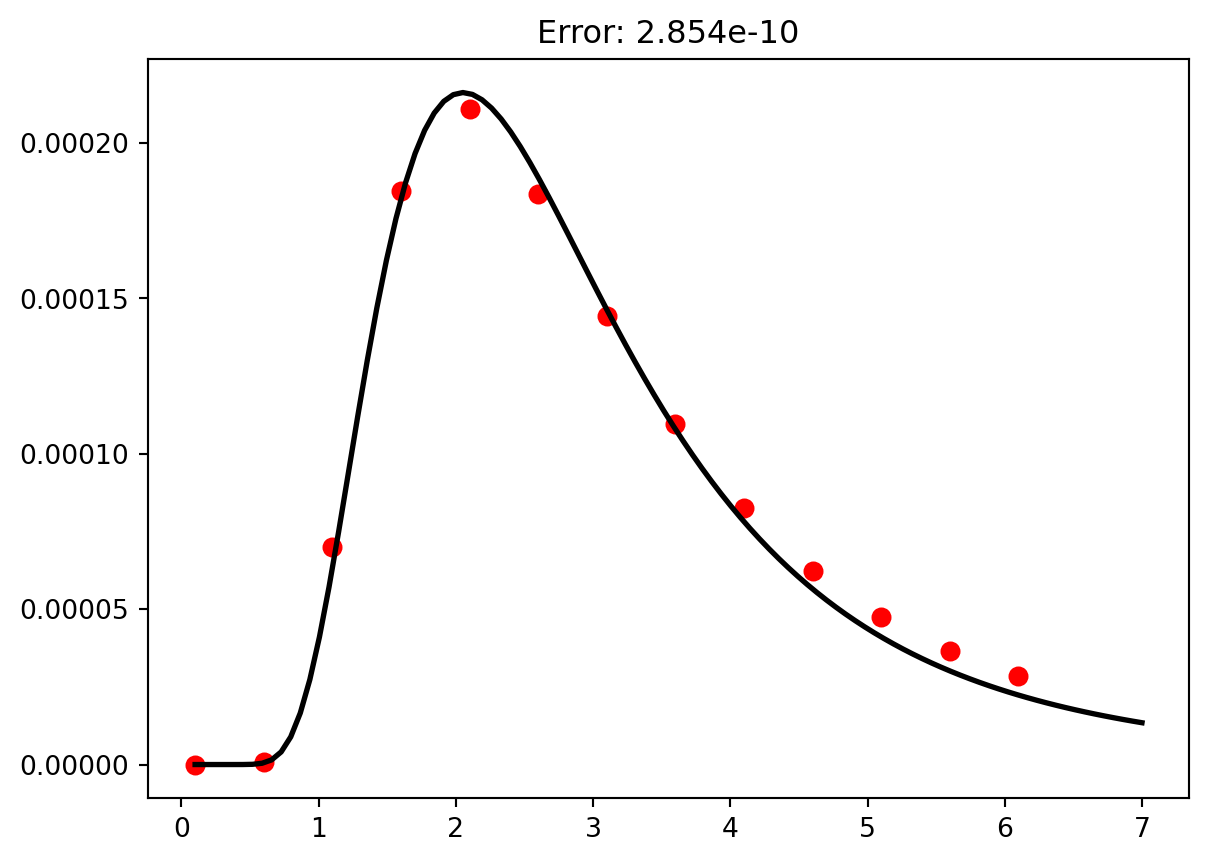

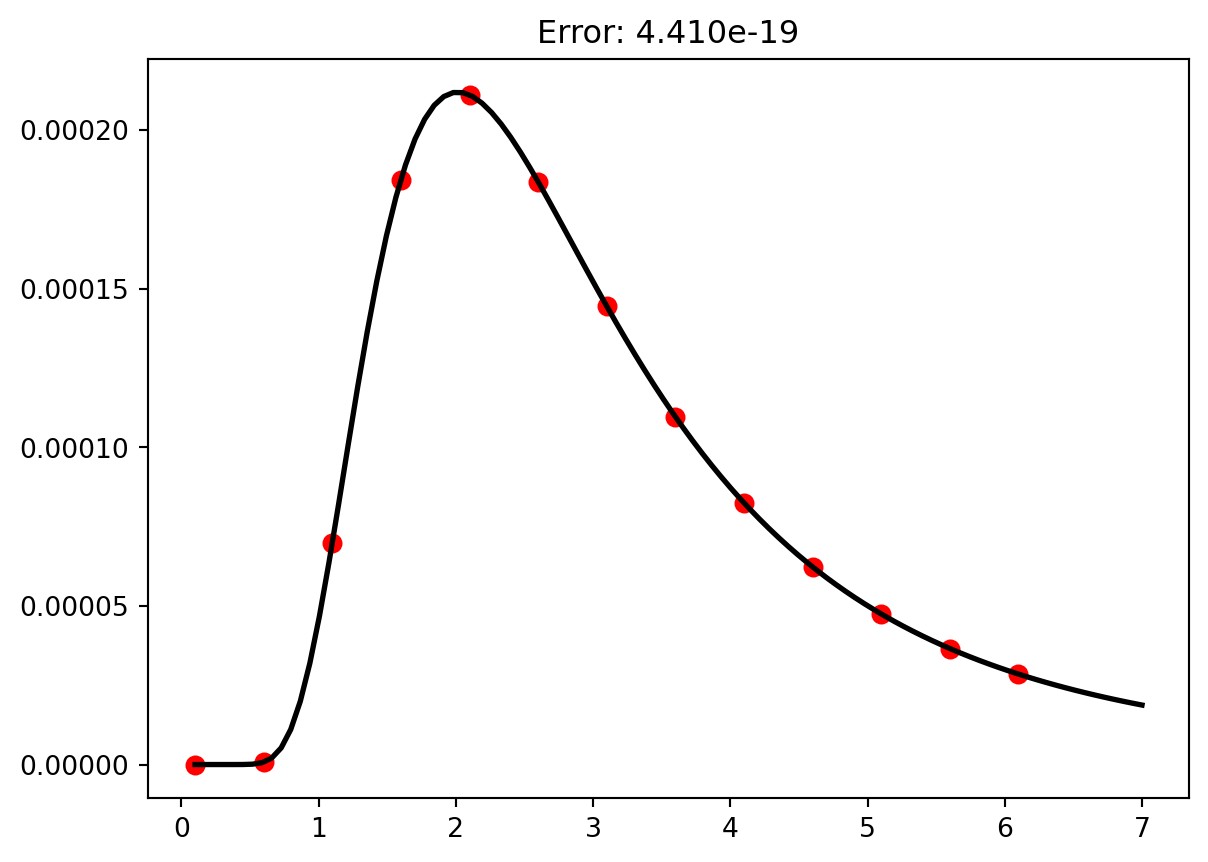

In [8]:
#| layout-ncol: 2

from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from numpy import exp,log,diagonal,sqrt,array

def fit_function(wvlength,a,b):
  return a * wvlength**-5 * 1/(exp(b/wvlength) + 1)

def fit_function_two(wvlength,a,b):
  return a * wvlength**-5 * 1/(exp(b/wvlength) - 1)

wavelength = array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1])
intensity = array([0, 7.43023e-7, 0.0000699768, 0.000184459, 0.000211137, 0.000183716, 0.000144493, 0.000109646, 0.0000825034, 0.0000623056, 0.0000474756, 0.0000365799, 0.0000285178])

paramsOne = curve_fit(fit_function,wavelength,intensity)
paramsTwo = curve_fit(fit_function_two,wavelength,intensity)
wDense = linspace(0.1,7,100)
iDenseOne = fit_function(wDense,paramsOne[0][0],paramsOne[0][1])
iDenseTwo = fit_function_two(wDense,paramsTwo[0][0],paramsTwo[0][1])

errorOne = sum((intensity - fit_function(wavelength,paramsOne[0][0],paramsOne[0][1]))**2 )
errorTwo = sum( (intensity - fit_function_two(wavelength,paramsTwo[0][0],paramsTwo[0][1]))**2 )

plt.plot(wavelength,intensity,'r.',ms = 13)
plt.plot(wDense,iDenseOne,'k',lw = 2)
plt.title(f"Error: {errorOne:1.3e}")
plt.show()


plt.plot(wavelength,intensity,'r.',ms = 13)
plt.plot(wDense,iDenseTwo,'k',lw = 2)
plt.title(f"Error: {errorTwo:1.3e}")
plt.show()

In [9]:
# Solution Here

In [10]:
# Solution Here

In [11]:
# Solution Here

In [12]:
# Solution Here